### Trying out the Hough Transform
[OpenCV Docs](https://docs.opencv.org/4.x/da/d53/tutorial_py_houghcircles.html)

[Tutorial](https://learnopencv.com/hough-transform-with-opencv-c-python/)

Import image
- import
- downsize
- grayscale

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.image as mpimg

In [2]:
from early_analysis import *

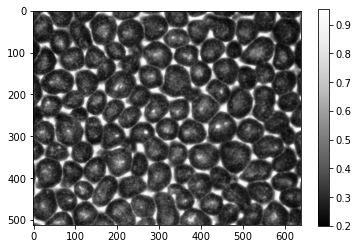

In [3]:
source_dir = "/Users/johnmays/Documents/Wirth Lab/convection-cell-research/data/LCB6mil90deg0_frames"
os.chdir(source_dir)
frame1 = mpimg.imread('frame1.png')
height, width, depth = np.shape(frame1)
frame1_downsized = cv.resize(frame1, (int(width/2), int(height/2)), cv.INTER_AREA) # downsize
frame1_downsized_gray = frame1_downsized[...,0] # convert to 1D grayscale
plt.imshow(frame1_downsized_gray, cmap='Greys_r')
plt.colorbar();

##### Step 1: Obtain Edges
- blur
- Canny Edge

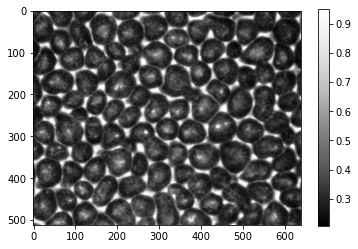

In [4]:
frame1_downsized_gray_blur = cv.medianBlur(frame1_downsized_gray, 3)
plt.imshow(frame1_downsized_gray_blur, cmap = 'Greys_r')
plt.colorbar();

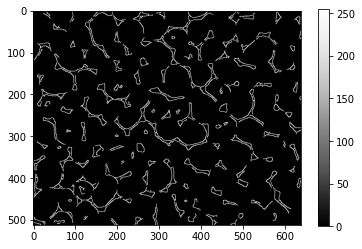

In [5]:
frame1_edgemap = cv.Canny(np.uint8(255*frame1_downsized_gray_blur),100, 240, 3) # 120,180
plt.imshow(frame1_edgemap, cmap = 'Greys_r')
plt.colorbar();

##### Step 2. Perform Hough

In [6]:
circles = cv.HoughCircles(frame1_edgemap, method = cv.HOUGH_GRADIENT, dp=1, minDist=60, param1=200, param2=10, minRadius=20, maxRadius=45)

In [7]:
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw outer circle
        cv.circle(frame1_downsized_gray_blur, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw inner circle
        cv.circle(frame1_downsized_gray_blur, (i[0], i[1]), 2, (0, 0, 255), 3)

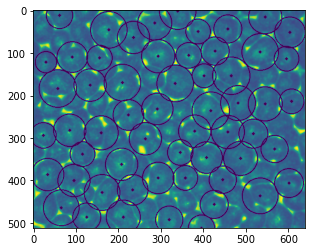

In [8]:
plt.imshow(frame1_downsized_gray_blur);